In [1]:
import os

In [3]:
os.environ["HOST"] = "localhost"
os.environ["BBUY_DATA"] = "/Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets/product_data/products"
os.environ["WEEK1_PATH"] = "/Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/search_engineering/week1/"
os.environ["WEEK2_PATH"] = "/Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/search_engineering/week2/"


In [5]:
!curl -k -X PUT -u admin:admin "https://localhost:9200/bbuy_products" -H 'Content-Type: application/json' -d @$WEEK1_PATH/bbuy_products.json

{"acknowledged":true,"shards_acknowledged":true,"index":"bbuy_products"}

In [8]:
!python index.py -s $BBUY_DATA -w 16 -b 500

INFO:Indexing /Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets/product_data/products to bbuy_products with 16 workers, refresh_interval of -1 to host localhost with a maximum number of docs sent per file per worker of 200000 and 500 per batch.
^C

Caught SIGINT. Shutting down workers...



Indexed 675577 documents (~50%) in 8m 37.1s. Introducing -m (as suggested by Dave) to limit number of files to spend less time indexing.

In [12]:
# clean up first
!curl -k -X DELETE -u admin:admin https://localhost:9200/bbuy_products


{"acknowledged":true}

In [13]:
!curl -k -X PUT -u admin:admin "https://localhost:9200/bbuy_products" -H 'Content-Type: application/json' -d @$WEEK1_PATH/bbuy_products.json

{"acknowledged":true,"shards_acknowledged":true,"index":"bbuy_products"}

In [14]:
!python index.py -s $BBUY_DATA -w 16 -b 500 -m 1000

INFO:Indexing /Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets/product_data/products to bbuy_products with 16 workers, refresh_interval of -1 to host localhost with a maximum number of docs sent per file per worker of 1000 and 500 per batch.
INFO:Done. 255077 were indexed in 2.909982067916667 minutes.  Total accumulated time spent in `bulk` indexing: 35.346926625566674 minutes


![Documents Indexed Rate](Documents%20Indexed%20Rate.png)

Re-indexing

In [15]:
!python index.py -s $BBUY_DATA -w 16 -b 500 -m 1000

INFO:Indexing /Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets/product_data/products to bbuy_products with 16 workers, refresh_interval of -1 to host localhost with a maximum number of docs sent per file per worker of 1000 and 500 per batch.
INFO:Done. 255077 were indexed in 2.821483982833333 minutes.  Total accumulated time spent in `bulk` indexing: 34.966568804966656 minutes


In [17]:
os.environ["BBUY_QUERIES"] = "/Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets/"

In [18]:
!python query.py -q $BBUY_QUERIES/train.csv -w 4 -m 25000

INFO:Loading query file from /Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets//train.csv and using seed 84 for worker: 1
INFO:Loading query file from /Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets//train.csv and using seed 126 for worker: 2
INFO:Loading query file from /Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets//train.csv and using seed 168 for worker: 3
INFO:Loading query file from /Users/krzysztof.mioduszews/Development/Courses/corise-search-eng/datasets//train.csv and using seed 42 for worker: 0
INFO:WN: 0: Running queries, checking in every 1000 queries:
INFO:WN: 1: Running queries, checking in every 1000 queries:
INFO:WN: 2: Running queries, checking in every 1000 queries:
INFO:WN: 3: Running queries, checking in every 1000 queries:
INFO:WN: 0: Query: led tv has 10 hits.
INFO:WN: 0: First result: {'_index': 'bbuy_products', '_id': '1953594', '_score': 0.10024474, '_source': {'sku': ['1953594'], '

Interrupted above after 8 minutes - observed similar bahaviour as in project meterials.
![Search Query Rate.png](<attachment:Search Query Rate.png>)
![Thread Pools](Thread%20Pools%20and%20the%20JVM.png)

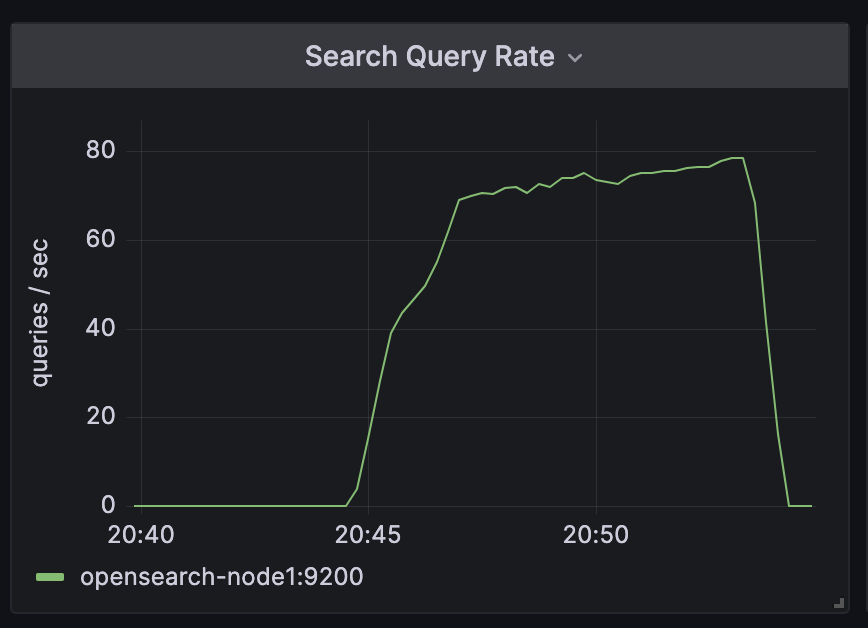

## Level 2